In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('2GIS_data.csv')
data = data.rename(columns={'Cusiene': 'Cuisine'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   address_comment                  6992 non-null   object 
 1   address_name                     9816 non-null   object 
 2   point                            9997 non-null   object 
 3   building_name                    1763 non-null   object 
 4   Restaurant_name                  10000 non-null  object 
 5   Brief_description                8883 non-null   object 
 6   postcode                         9963 non-null   float64
 7   Count_branches                   10000 non-null  int64  
 8   Type_of_institution              10000 non-null  object 
 9   general_rating                   8102 non-null   float64
 10  general_review_count             8102 non-null   float64
 11  general_review_count_with_stars  8446 non-null   float64
 12  org_rating         

In [ ]:
data

,address_comment,address_name,point,building_name,Restaurant_name,Brief_description,postcode,Count_branches,Type_of_institution,general_rating,...,org_rating,org_review_count,org_review_count_with_stars,working_days,working_hours,restaurant_category,transport_connection,Cuisine,Average_bill,Price_level
0,2 этаж,"Страстной бульвар, 8а","{'lat': 55.766402, 'lon': 37.610584}",ТЦ На Страстном,The Бык,демократичный мясной ресторан,107031.0,20,['Кафе'],4.2,...,4.2,4560.0,9029.0,пн—вс,11:00–23:00,"['Ресторан', 'кафе', 'бар']","{'Пушкинская': '164 м', 'Метро Чеховская': '16...",NaN,700–1400 ₽,средние
1,1 этаж,"2-я Останкинская улица, 3","{'lat': 55.826374, 'lon': 37.629548}",NaN,The Бык,демократичный мясной ресторан,129515.0,20,"['Кафе', 'Рестораны']",3.9,...,4.2,4560.0,9029.0,пн—вс,12:00–23:00,['Ресторан'],"{'Улица Академика Королёва': '850 м', 'Арка Юж...",NaN,700–1400 ₽,NaN
2,1 этаж,"улица Пречистенка, 19/11 ст1","{'lat': 55.741242, 'lon': 37.593171}",NaN,Bagebi,ресторан грузинской кухни с зимним садом,119034.0,1,"['Кафе', 'Рестораны', 'Бары']",4.6,...,4.6,606.0,16330.0,пн—вс,09:00–24:00,"['Ресторан', 'банкетный зал']","{'Кропоткинская': '710 м', 'Академия художеств...",грузинская,до 3500 ₽,NaN
3,1 этаж,"улица Солянка, 1/2","{'lat': 55.754456, 'lon': 37.638015}",NaN,The Black Swan Pub,NaN,109028.0,1,"['Кафе', 'Бары']",4.2,...,4.2,262.0,548.0,"пн—чт, вс, пт—сб","12:00–24:00, 12:00–06:00",['Ресторан'],"{'Китай-город': '190 м', 'Метро Китай-город': ...",NaN,1500–2500 ₽,высокие
4,1 этаж,"Новослободская улица, 16","{'lat': 55.781759, 'lon': 37.599088}",NaN,The Бык,демократичный мясной ресторан,127055.0,20,"['Кафе', 'Рестораны']",4.1,...,4.2,4560.0,9029.0,пн—вс,12:00–23:00,"['Ресторан', 'кафе']","{'Менделеевская': '23 м', 'Метро Менделеевская...",NaN,700–1400 ₽,средние
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,"Каширское шоссе 77 километр, ст3","{'lat': 55.130561, 'lon': 37.93468}",NaN,Мама ланч,NaN,142842.0,1,['Кафе'],4.8,...,4.8,8.0,11.0,пн—вс,00:00–24:00,['Кафе'],{'СНТ Родник': '640 м'},NaN,200–350 ₽,средние
9996,NaN,"Ленино деревня, 54Б","{'lat': 55.882697, 'lon': 37.056871}",NaN,Снегири,кофейня,143590.0,1,"['Кофейни', 'Кондитерские изделия']",NaN,...,NaN,NaN,NaN,пн—вс,09:00–21:00,"['Кафе', 'кофе с собой', 'кофейня']",{'Станция Снегири': '16 м'},NaN,NaN,NaN
9997,NaN,"деревня Бритово, 94","{'lat': 55.476029, 'lon': 38.173221}",NaN,Кафе,NaN,140126.0,1,['Кафе'],1.0,...,1.0,1.0,2.0,пн—вс,00:00–24:00,NaN,NaN,NaN,NaN,NaN
9998,NaN,"деревня Солосцово, ст21","{'lat': 55.08519, 'lon': 38.696249}",NaN,В полях,кафе,140400.0,1,"['Кафе', 'Банкетные залы']",NaN,...,NaN,NaN,NaN,NaN,NaN,"['База, дом отдыха']","{'Солосцово': '1,79 км'}",NaN,NaN,NaN


Объединим столбцы Type_of_institution и restaurant_category

In [ ]:
data['restaurant_category'] = data['restaurant_category'].fillna(data['Type_of_institution'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   address_comment                  6992 non-null   object 
 1   address_name                     9816 non-null   object 
 2   point                            9997 non-null   object 
 3   building_name                    1763 non-null   object 
 4   Restaurant_name                  10000 non-null  object 
 5   Brief_description                8883 non-null   object 
 6   postcode                         9963 non-null   float64
 7   Count_branches                   10000 non-null  int64  
 8   Type_of_institution              10000 non-null  object 
 9   general_rating                   8102 non-null   float64
 10  general_review_count             8102 non-null   float64
 11  general_review_count_with_stars  8446 non-null   float64
 12  org_rating         

In [ ]:
data[data['address_name'].isna()]

,address_comment,address_name,point,building_name,Restaurant_name,Brief_description,postcode,Count_branches,Type_of_institution,general_rating,...,org_rating,org_review_count,org_review_count_with_stars,working_days,working_hours,restaurant_category,transport_connection,Cuisine,Average_bill,Price_level
1382,NaN,NaN,"{'lat': 55.83914, 'lon': 37.625843}",NaN,Ферма,кафе,129223.0,1,"['Кафе', 'Доставка еды', 'Банкетные залы']",3.0,...,3.0,41.0,64.0,"пн—пт, сб—вс","10:00–20:00, 10:00–21:00","['Кафе', 'банкетный зал', 'ресторан']","{'Ботанический сад': '1,04 км', 'Городская фер...",NaN,1000–1500 ₽,выше среднего
1520,NaN,NaN,"{'lat': 55.730223, 'lon': 36.852584}",NaN,Дом,кофейня,143180.0,1,"['Кофейни', 'Продажа кофе', 'Кафе']",4.5,...,4.5,28.0,43.0,"пн—пт, сб—вс","08:00–22:00, 10:00–22:00","['Кофейня', 'кафе', 'бар']","{'Волгоградский проспект': '770 м', 'Мясокомби...",NaN,NaN,выше среднего
1789,NaN,NaN,"{'lat': 55.729475, 'lon': 36.856896}",NaN,Братец кролик,гастропаб,143180.0,1,"['Кафе', 'Доставка еды']",4.1,...,4.1,40.0,49.0,"пн—чт, пт—сб, вс","11:00–22:00, 10:00–23:00, 10:00–22:00","['Кафе', 'Доставка еды']",NaN,NaN,NaN,NaN
2189,NaN,NaN,"{'lat': 55.666621, 'lon': 37.354016}",NaN,На опушке,кафе,NaN,1,['Кафе'],3.3,...,3.3,10.0,19.0,NaN,NaN,"['Ресторан', 'банкетный зал', 'доставка еды и ...","{'Добрынинская': '206 м', 'Коровий Вал': '204 м'}",NaN,1800–1800 ₽,выше среднего
2420,NaN,NaN,"{'lat': 55.7697, 'lon': 37.595185}",NaN,Цензура Ин1:1,кофейня,125047.0,1,['Кофейни'],3.9,...,3.9,16.0,27.0,"пн—пт, сб—вс","08:00–23:00, 10:00–23:00","['Кафе', 'кофейня']","{'Маяковская': '120 м', 'Метро Маяковская': '1...",NaN,от 550 ₽,средние
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,1 этаж,NaN,"{'lat': 55.623925, 'lon': 37.950685}",NaN,Чайхана,NaN,140060.0,1,"['Кафе', 'Доставка еды']",4.0,...,4.0,2.0,4.0,пн—сб,09:00–22:00,"['Кафе', 'Доставка еды']",NaN,NaN,NaN,NaN
9943,NaN,NaN,"{'lat': 56.12716, 'lon': 36.8073}",NaN,Рыбацкое,кафе,141554.0,1,"['Кафе', 'Банкетные залы']",NaN,...,NaN,NaN,NaN,пн—вс,10:00–22:00,"['Кафе', 'Банкетные залы']",NaN,NaN,NaN,NaN
9969,NaN,NaN,"{'lat': 55.447426, 'lon': 38.48411}",NaN,Шашлыки мира,кафе,140251.0,1,"['Кафе', 'Доставка еды']",NaN,...,NaN,NaN,NaN,пн—вс,11:00–24:00,['Доставка еды и обедов'],"{'Нижегородская': '176 м', 'Метро Нижегородска...","итальянская, кавказская, восточная, домашняя",NaN,NaN
9985,NaN,NaN,"{'lat': 56.051118, 'lon': 37.875135}",NaN,Шашлычная,NaN,141216.0,1,['Кафе'],5.0,...,5.0,1.0,1.0,пн—вс,10:00–20:00,"['Кафе', 'кофейня', 'быстрое питание']",{'ЖК Домодедово Парк': '550 м'},NaN,NaN,NaN


In [ ]:
#data['is_deleted'].unique()

In [ ]:
#data[data['is_deleted'] == True]

In [ ]:
data['building_name'].value_counts()

,count
building_name,
Шереметьево,38
Домодедово,25
терминал А,24
Vegas,20
ТЦ Мега,20
...,...
КЦ Зеленоград,1
Башня ВТБ,1
Отель Салют,1


In [ ]:
data[data['point'].isna()]

,address_comment,address_name,point,building_name,Restaurant_name,Brief_description,postcode,Count_branches,Type_of_institution,general_rating,...,org_rating,org_review_count,org_review_count_with_stars,working_days,working_hours,restaurant_category,transport_connection,Cuisine,Average_bill,Price_level
6316,NaN,NaN,NaN,NaN,Шашлык Club,кафе,NaN,1,"['Кафе', 'Доставка еды']",3.7,...,3.7,7.0,8.0,пн—вс,09:00–24:00,"['Кафе', 'Доставка еды']",NaN,NaN,NaN,NaN
7202,NaN,NaN,NaN,NaN,Vecher,кафе,NaN,1,"['Кафе', 'Доставка еды']",5.0,...,5.0,1.0,1.0,"пн—чт, пт—вс","11:00–24:00, 11:00–02:00","['Кафе', 'Доставка еды']",NaN,NaN,NaN,NaN
7682,NaN,NaN,NaN,NaN,Meti pasticceria,кондитерская-булочная,NaN,1,"['Кофейни', 'Доставка еды']",NaN,...,NaN,NaN,NaN,пн—вс,08:10–19:00,"['Кофейни', 'Доставка еды']",NaN,NaN,NaN,NaN


дропнуть 5 без рейтингов

In [ ]:
data['Brief_description'].nunique()

682

In [ ]:
data[data['postcode'].isna()]

,address_comment,address_name,point,building_name,Restaurant_name,Brief_description,postcode,Count_branches,Type_of_institution,general_rating,...,org_rating,org_review_count,org_review_count_with_stars,working_days,working_hours,restaurant_category,transport_connection,Cuisine,Average_bill,Price_level
137,NaN,"деревня Немчиново, 3в","{'lat': 55.671632, 'lon': 37.375562}",NaN,Лесная чайная,кафе,NaN,1,['Кафе'],3.6,...,3.6,95.0,197.0,"пн—пт, сб—вс","09:00–20:00, 09:00–21:00",['Кафе'],"{'Говорово': '3,4 км', 'Международный универси...",NaN,от 250 ₽,средние
2189,NaN,NaN,"{'lat': 55.666621, 'lon': 37.354016}",NaN,На опушке,кафе,NaN,1,['Кафе'],3.3,...,3.3,10.0,19.0,NaN,NaN,"['Ресторан', 'банкетный зал', 'доставка еды и ...","{'Добрынинская': '206 м', 'Коровий Вал': '204 м'}",NaN,1800–1800 ₽,выше среднего
3058,1 этаж,"Крымская улица, 3 к1","{'lat': 55.536923, 'lon': 37.615323}",NaN,Здрасте,кофейня,NaN,83,"['Кофейни', 'Доставка еды', 'Кафе', 'Продажа к...",3.7,...,4.5,2041.0,2454.0,пн—вс,08:00–22:00,"['Кафе', 'кофе с собой', 'ресторан']",{'Крымская улица': '128 м'},NaN,700–800 ₽,средние
3474,1 этаж,"Лесная улица, 20 к1","{'lat': 55.533028, 'lon': 37.618841}",NaN,Эмилия,кафе-пиццерия,NaN,1,"['Кафе', 'Доставка еды']",3.4,...,3.4,25.0,28.0,"пн—чт, вс, пт—сб","11:00–23:00, 11:00–24:00","['Кафе', 'пиццерия', 'бар']","{'Крымская улица, 13': '470 м'}",NaN,NaN,выше среднего
3898,NaN,"Центральная улица, 76а","{'lat': 55.79938, 'lon': 37.307802}",NaN,Раз Два,шашлычная,NaN,2,"['Кафе', 'Доставка еды']",4.3,...,4.7,19.0,22.0,пн—вс,10:00–23:00,['Кафе'],{'Переезд': '96 м'},"домашняя, мясная, шашлык",NaN,средние
3965,NaN,"Дольская улица, 10 ст3","{'lat': 55.618539, 'lon': 37.682224}",NaN,Кофишенская,кафе,NaN,1,['Кафе'],4.4,...,4.4,111.0,116.0,ср—вс,10:00–21:00,['Кафе'],"{'Орехово': '1,03 км', 'Дольская улица': '360 м'}",NaN,1000–1500 ₽,выше среднего
4089,1 этаж,"посёлок Боброво, 23а ст1","{'lat': 55.528325, 'lon': 37.616006}",NaN,Тархун Боброво,магазин фастфудной продукции,NaN,1,"['Кафе', 'Доставка еды', 'Банкетные залы']",4.8,...,4.8,22.0,24.0,пн—вс,11:00–24:00,['Кафе'],"{'Крымская улица, 25': '139 м'}",NaN,NaN,NaN
4267,NaN,"Бисеровское шоссе, 47","{'lat': 55.763804, 'lon': 38.121443}",NaN,Family club Biserovo,NaN,NaN,1,"['Кафе', 'Банкетные залы']",NaN,...,NaN,NaN,NaN,пн—вс,10:00–23:00,"['Банкетный зал', 'кафе']",{'База': '460 м'},NaN,NaN,NaN
4474,NaN,"Лесная улица, 20/1","{'lat': 55.532687, 'lon': 37.621533}",NaN,Sultan Sofrasi,кафе,NaN,1,"['Кафе', 'Доставка еды']",3.4,...,3.4,22.0,25.0,пн—вс,10:00–23:00,"['Кафе', 'быстрое питание', 'бар']","{'Жулебино': '470 м', 'Улица Генерала Кузнецов...",NaN,500–1200 ₽,средние
4751,NaN,"Лесная улица, 14","{'lat': 55.537375, 'lon': 37.621366}",NaN,Буланжерия Жанн,NaN,NaN,1,"['Кофейни', 'Кондитерские изделия', 'Кафе-конд...",5.0,...,5.0,2.0,2.0,пн—вс,08:00–22:00,"['Кофейня', 'кондитерская', 'кафе']",{'Крымская улица': '610 м'},NaN,NaN,NaN


# Описание данных

### Пропущенные значения

In [ ]:
num_missing = data.isna().sum()
percent_missing = data.isna().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'count_missing': num_missing,
                                 'percent_missing': percent_missing})
display(missing_value_df)

total_missing = num_missing.sum()
overall_missing_percentage = (total_missing / (len(data) * len(data.columns))) * 100
print(f"\nTotal number of missing values: {total_missing}")
print(f"Overall percentage of missing values: {overall_missing_percentage:.2f}%")

,count_missing,percent_missing
address_comment,3008,30.08
address_name,184,1.84
point,3,0.03
building_name,8237,82.37
Restaurant_name,0,0.00
Brief_description,1117,11.17
postcode,37,0.37
Count_branches,0,0.00
Type_of_institution,0,0.00
general_rating,1898,18.98



Total number of missing values: 48569
Overall percentage of missing values: 22.08%


# Очистка данных

Удалим столбцы full_name и purpose_name, которые дублируют значения других столбцов, но при этом имеют мало данных

In [ ]:
#data.drop(['full_name', 'purpose_name'], axis=1, inplace=True)

Также удалим столбец, обозначающий то, что место было удалено (is_deleted), а также строки, где is_deleted = True

In [ ]:
#data = data[data['is_deleted'] != True]

In [ ]:
#data.drop(['is_deleted'], axis=1, inplace=True)

Предположим, что если у локации не прописан этаж, то это, скорее всего, часть обычного здания и находится на первом этаже. Аналогично с building_name, который указан у тех точках, которые находятся в торговых центрах, аэропортах и тд.

In [ ]:
data[['address_comment']] = data[['address_comment']].fillna(value='1 этаж')

In [ ]:
data[['building_name']] = data[['building_name']].fillna(value='Отдельное заведение')

Адрес - одна из основных переменных, поэтому удалим отсутствующие значения

In [ ]:
data = data.dropna(subset = ['address_name'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9816 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   address_comment                  9816 non-null   object 
 1   address_name                     9816 non-null   object 
 2   point                            9816 non-null   object 
 3   building_name                    9816 non-null   object 
 4   Restaurant_name                  9816 non-null   object 
 5   Brief_description                8734 non-null   object 
 6   postcode                         9790 non-null   float64
 7   Count_branches                   9816 non-null   int64  
 8   Type_of_institution              9816 non-null   object 
 9   general_rating                   7983 non-null   float64
 10  general_review_count             7983 non-null   float64
 11  general_review_count_with_stars  8312 non-null   float64
 12  org_rating               

Также удалим строки, где нет координат, и при этом нет данных во многих столбцах (в столбцах рейтинга)

In [ ]:
data = data.dropna(subset = ['point'])

Еще можно удалить строки, где название заведения - просто 'Кафе'

In [ ]:
data = data[data['Restaurant_name'] != 'Кафе']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   address_comment                  9742 non-null   object 
 1   address_name                     9742 non-null   object 
 2   point                            9742 non-null   object 
 3   building_name                    9742 non-null   object 
 4   Restaurant_name                  9742 non-null   object 
 5   Brief_description                8731 non-null   object 
 6   postcode                         9716 non-null   float64
 7   Count_branches                   9742 non-null   int64  
 8   Type_of_institution              9742 non-null   object 
 9   general_rating                   7956 non-null   float64
 10  general_review_count             7956 non-null   float64
 11  general_review_count_with_stars  8279 non-null   float64
 12  org_rating               

In [ ]:
#data.to_csv('cleaned_2gis.csv')

# Заполнение пропусков парсера

In [ ]:
data.isna().sum()

,0
address_comment,0
address_name,0
point,0
building_name,0
Restaurant_name,0
Brief_description,1011
postcode,26
Count_branches,0
Type_of_institution,0
general_rating,1786


In [ ]:
temp = data[~data['restaurant_category'].isna()]
name_counts = temp['Restaurant_name'].value_counts()
name_counts[name_counts > 1].sort_values(ascending=False)

,count
Restaurant_name,
Шоколадница,237
CofeFest,164
Кофепорт,99
SeDelice,96
Stars Coffee,81
...,...
Шафран,2
Чикаго,2
Noosh Cafe,2


In [ ]:
name_counts[name_counts > 1].sum()

4587

Заполним пропуски в категории ресторанов для тех ресторанов, у которых несколько филиалов в Москве

In [ ]:
data['restaurant_category'] = data['restaurant_category'].replace('[]', np.nan)

In [ ]:
data['restaurant_category'] = data.groupby('Restaurant_name')['restaurant_category'].transform(lambda x: x.ffill().bfill())

<ipython-input-31-6a6d45e8a958>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['restaurant_category'] = data.groupby('Restaurant_name')['restaurant_category'].transform(lambda x: x.ffill().bfill())


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   address_comment                  9742 non-null   object 
 1   address_name                     9742 non-null   object 
 2   point                            9742 non-null   object 
 3   building_name                    9742 non-null   object 
 4   Restaurant_name                  9742 non-null   object 
 5   Brief_description                8731 non-null   object 
 6   postcode                         9716 non-null   float64
 7   Count_branches                   9742 non-null   int64  
 8   Type_of_institution              9742 non-null   object 
 9   general_rating                   7956 non-null   float64
 10  general_review_count             7956 non-null   float64
 11  general_review_count_with_stars  8279 non-null   float64
 12  org_rating               

transport_connection

In [ ]:
data[~data['transport_connection'].isna()][['Restaurant_name', 'transport_connection']]

,Restaurant_name,transport_connection
0,The Бык,"{'Пушкинская': '164 м', 'Метро Чеховская': '16..."
1,The Бык,"{'Улица Академика Королёва': '850 м', 'Арка Юж..."
2,Bagebi,"{'Кропоткинская': '710 м', 'Академия художеств..."
3,The Black Swan Pub,"{'Китай-город': '190 м', 'Метро Китай-город': ..."
4,The Бык,"{'Менделеевская': '23 м', 'Метро Менделеевская..."
...,...,...
9993,LaserLand,"{'Молодёжная': '4,4 км', 'ТРЦ Вегас': '239 м'}"
9995,Мама ланч,{'СНТ Родник': '640 м'}
9996,Снегири,{'Станция Снегири': '16 м'}
9998,В полях,"{'Солосцово': '1,79 км'}"


In [ ]:
import ast


def get_transport(row):
    transport = row['transport_connection']
    if transport == '{}' or transport == None:
      return pd.Series([np.nan, np.nan, np.nan, np.nan])


    try:
        transport = ast.literal_eval(transport)
    except ValueError:
        return pd.Series([np.nan, np.nan, np.nan, np.nan])

    items = list(transport.items())

    if len(items) < 2:
        return pd.Series([np.nan, np.nan, np.nan, np.nan])


    nearest_metro = str(items[0][0])

    metro_dist_ = items[0][1].split()
    if 'км' in metro_dist_:
      metro_dist = int(float(metro_dist_[0].replace(',', '.')) * 1000)
    else:
      metro_dist = int(items[0][1].split()[0])

    nearest_bus = str(items[1][0])

    bus_dist_ = items[1][1].split()
    if 'км' in bus_dist_:
      bus_dist = int(float(bus_dist_[0].replace(',', '.')) * 1000)
    else:
      bus_dist = int(items[1][1].split()[0])
    return pd.Series([nearest_metro, metro_dist, nearest_bus, bus_dist])

In [ ]:
data[['nearest_metro', 'metro_dist', 'nearest_bus', 'bus_dist']] = data.apply(get_transport, axis=1)

## Средний счет и уровень цен

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   address_comment                  9742 non-null   object 
 1   address_name                     9742 non-null   object 
 2   point                            9742 non-null   object 
 3   building_name                    9742 non-null   object 
 4   Restaurant_name                  9742 non-null   object 
 5   Brief_description                8731 non-null   object 
 6   postcode                         9716 non-null   float64
 7   Count_branches                   9742 non-null   int64  
 8   Type_of_institution              9742 non-null   object 
 9   general_rating                   7956 non-null   float64
 10  general_review_count             7956 non-null   float64
 11  general_review_count_with_stars  8279 non-null   float64
 12  org_rating               

In [ ]:
data.Average_bill.unique()

array(['700–1400 ₽', 'до 3500 ₽', '1500–2500 ₽', nan, '700–1700 ₽',
       '1000–1500 ₽', '600–700 ₽', '1200–1500 ₽', '2000–2500 ₽',
       '600–600 ₽', '500–1500 ₽', 'от 2500 ₽', '500–700 ₽', '400–600 ₽',
       '1000–5000 ₽', '1000–1000 ₽', '600–1000 ₽', '2500–3000 ₽',
       '450–450 ₽', '1000–15000 ₽', '700–1500 ₽', '500–2000 ₽',
       '1500–2000 ₽', '1500–4500 ₽', 'от 850 ₽', 'от 1000 ₽', '700–700 ₽',
       '300–1800 ₽', '1300–1500 ₽', '350–700 ₽', 'от 1300 ₽',
       '2100–3500 ₽', 'от 500 ₽', '700–1000 ₽', '1300–2000 ₽',
       '800–1500 ₽', '400–500 ₽', '1000–2000 ₽', '2500–3500 ₽',
       'от 250 ₽', '750–1200 ₽', '500–800 ₽', '980–980 ₽', '250–800 ₽',
       '1500–3500 ₽', '2000–3000 ₽', 'от 800 ₽', '2500–5000 ₽',
       '1500–1998 ₽', '1400–1700 ₽', 'от 1700 ₽', 'от 1500 ₽',
       '980–1500 ₽', '800–1000 ₽', '800–1200 ₽', '1100–1100 ₽',
       '350–500 ₽', '450–1000 ₽', '350–1500 ₽', '1300–1800 ₽',
       '700–2000 ₽', '700–1200 ₽', '450–600 ₽', '1000–1200 ₽',
       '200

In [ ]:
data['Average_bill'] = data.groupby('Restaurant_name')['Average_bill'].transform(lambda x: x.ffill().bfill())

<ipython-input-38-8dadc37232c8>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Average_bill'] = data.groupby('Restaurant_name')['Average_bill'].transform(lambda x: x.ffill().bfill())


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   address_comment                  9742 non-null   object 
 1   address_name                     9742 non-null   object 
 2   point                            9742 non-null   object 
 3   building_name                    9742 non-null   object 
 4   Restaurant_name                  9742 non-null   object 
 5   Brief_description                8731 non-null   object 
 6   postcode                         9716 non-null   float64
 7   Count_branches                   9742 non-null   int64  
 8   Type_of_institution              9742 non-null   object 
 9   general_rating                   7956 non-null   float64
 10  general_review_count             7956 non-null   float64
 11  general_review_count_with_stars  8279 non-null   float64
 12  org_rating               

In [ ]:
data[data['Average_bill'].notna() & (data['Price_level'].isna())][['Restaurant_name', 'Average_bill', 'Price_level']]

,Restaurant_name,Average_bill,Price_level
1,The Бык,700–1400 ₽,NaN
2,Bagebi,до 3500 ₽,NaN
23,Молодежь,1200–1500 ₽,NaN
24,She,2000–2500 ₽,NaN
28,Nicepricecafe,600–600 ₽,NaN
...,...,...,...
9960,Кафе-столовая,230–260 ₽,NaN
9970,Vitae healthy food,1000–1500 ₽,NaN
9974,Чашка,800–1000 ₽,NaN
9977,Хинкальная,500–1000 ₽,NaN


In [ ]:
mapping = data.dropna(subset=['Average_bill', 'Price_level']).set_index('Average_bill')['Price_level'].to_dict()

data['Price_level'] = data['Price_level'].fillna(data['Average_bill'].map(mapping))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   address_comment                  9742 non-null   object 
 1   address_name                     9742 non-null   object 
 2   point                            9742 non-null   object 
 3   building_name                    9742 non-null   object 
 4   Restaurant_name                  9742 non-null   object 
 5   Brief_description                8731 non-null   object 
 6   postcode                         9716 non-null   float64
 7   Count_branches                   9742 non-null   int64  
 8   Type_of_institution              9742 non-null   object 
 9   general_rating                   7956 non-null   float64
 10  general_review_count             7956 non-null   float64
 11  general_review_count_with_stars  8279 non-null   float64
 12  org_rating               

## Кухни

In [ ]:
data['Cuisine'] = data.groupby('Restaurant_name')['Cuisine'].transform(lambda x: x.ffill().bfill())

<ipython-input-43-1c13974cd281>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Cuisine'] = data.groupby('Restaurant_name')['Cuisine'].transform(lambda x: x.ffill().bfill())


In [ ]:
data['Cuisine'].nunique()

358

## Категории ресторанов

Есть столбец restaurant_category, который заполнен строками с множеством различных тегов, обозначающих то, что из себя представляет заведения. Есть множество тегов, так что для удобства анализа отдельно выделим такие, как ресторан, кафе, кофейня, бар, пекарня, а все остальные отнесем в 'прочее'

In [ ]:
import json


def categorize_restaurants(row):
    categories = row['restaurant_category']

    if pd.isna(categories):
      return pd.Series([0, 0, 0, 0, 0, 0])

    categories = categories[1:-2].replace("'", "").split(", ")

    categories = [cat.lower() for cat in categories]

    has_restaurant = any('ресторан' in cat for cat in categories)
    has_cafe = any('кафе' in cat for cat in categories)
    has_coffee_shop = any('кофейня' in cat for cat in categories)
    has_bar = any('бар' in cat for cat in categories)
    has_bakery = any('пекарня' in cat for cat in categories)
    has_other = any(cat not in ['ресторан', 'кафе', 'кофейня', 'бар', 'пекарня'] for cat in categories)

    return pd.Series([int(has_restaurant), int(has_cafe), int(has_coffee_shop), int(has_bar), int(has_bakery), int(has_other)])

In [ ]:
data[['is_restaurant', 'is_cafe', 'is_coffee_shop', 'is_bar', 'is_bakery', 'is_other']] = data.apply(categorize_restaurants, axis=1)

In [ ]:
data[['restaurant_category', 'is_restaurant', 'is_cafe', 'is_coffee_shop', 'is_bar', 'is_bakery', 'is_other']]

,restaurant_category,is_restaurant,is_cafe,is_coffee_shop,is_bar,is_bakery,is_other
0,"['Ресторан', 'кафе', 'бар']",1,1,0,1,0,0
1,['Ресторан'],1,0,0,0,0,0
2,"['Ресторан', 'банкетный зал']",1,0,0,0,0,1
3,['Ресторан'],1,0,0,0,0,0
4,"['Ресторан', 'кафе']",1,1,0,0,0,0
...,...,...,...,...,...,...,...
9994,['Кафе'],0,1,0,0,0,0
9995,['Кафе'],0,1,0,0,0,0
9996,"['Кафе', 'кофе с собой', 'кофейня']",0,1,1,0,0,1
9998,"['База, дом отдыха']",0,0,0,0,0,1


In [ ]:
data = data.reset_index()

In [ ]:
data.to_csv('2GIS_final.csv', index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            9742 non-null   int64  
 1   address_comment                  9742 non-null   object 
 2   address_name                     9742 non-null   object 
 3   point                            9742 non-null   object 
 4   building_name                    9742 non-null   object 
 5   Restaurant_name                  9742 non-null   object 
 6   Brief_description                8731 non-null   object 
 7   postcode                         9716 non-null   float64
 8   Count_branches                   9742 non-null   int64  
 9   Type_of_institution              9742 non-null   object 
 10  general_rating                   7956 non-null   float64
 11  general_review_count             7956 non-null   float64
 12  general_review_count

# Поиск аномалий

Посмотрим, сколько значений находятся за пределами радиуса от центра Москвы

In [ ]:
from geopy.distance import geodesic as GD

def distance_calculation(row):
  moscow = '55.755814, 37.617635'
  lat = float(row['point'].split(',')[0].split(':')[1].strip())
  lon = float(row['point'].split(',')[1].split(':')[1].replace('}', '').strip())
  coord = (lat, lon)

  return GD(moscow, coord).km

data["distance_to_center_km"] = data.apply(distance_calculation, axis=1)

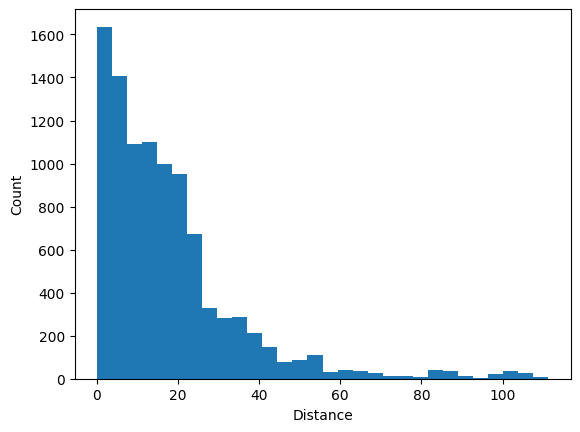

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data['distance_to_center_km'], bins=30)
plt.ylabel('Count')
plt.xlabel('Distance');

In [ ]:
data_filtered = data[data['distance_to_center_km'] <= 30]

Оставим только те локации, находящиеся в пределах МКАДА и немного за ним

In [ ]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8224 entries, 0 to 9741
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            8224 non-null   int64  
 1   address_comment                  8224 non-null   object 
 2   address_name                     8224 non-null   object 
 3   point                            8224 non-null   object 
 4   building_name                    8224 non-null   object 
 5   Restaurant_name                  8224 non-null   object 
 6   Brief_description                7397 non-null   object 
 7   postcode                         8199 non-null   float64
 8   Count_branches                   8224 non-null   int64  
 9   Type_of_institution              8224 non-null   object 
 10  general_rating                   6873 non-null   float64
 11  general_review_count             6873 non-null   float64
 12  general_review_count_with

Получается аномальных значений:

In [ ]:
data[data['distance_to_center_km'] > 30]['index'].count()

1518

1518 аномальных значений

In [ ]:
data_filtered.to_csv('2GIS_final_filtered.csv')

# Пропущенные значения после очистки и обработки данных

In [ ]:
num_missing = data_filtered.isna().sum()
percent_missing = data_filtered.isna().sum() * 100 / len(data_filtered)
missing_value_df = pd.DataFrame({'count_missing': num_missing,
                                 'percent_missing': percent_missing})
display(missing_value_df)

total_missing = num_missing.sum()
overall_missing_percentage = (total_missing / (len(data_filtered) * len(data_filtered.columns))) * 100
print(f"\nTotal number of missing values: {total_missing}")
print(f"Overall percentage of missing values: {overall_missing_percentage:.2f}%")

,count_missing,percent_missing
index,0,0.000000
address_comment,0,0.000000
address_name,0,0.000000
point,0,0.000000
building_name,0,0.000000
Restaurant_name,0,0.000000
Brief_description,827,10.055934
postcode,25,0.303988
Count_branches,0,0.000000
Type_of_institution,0,0.000000



Total number of missing values: 35564
Overall percentage of missing values: 12.72%


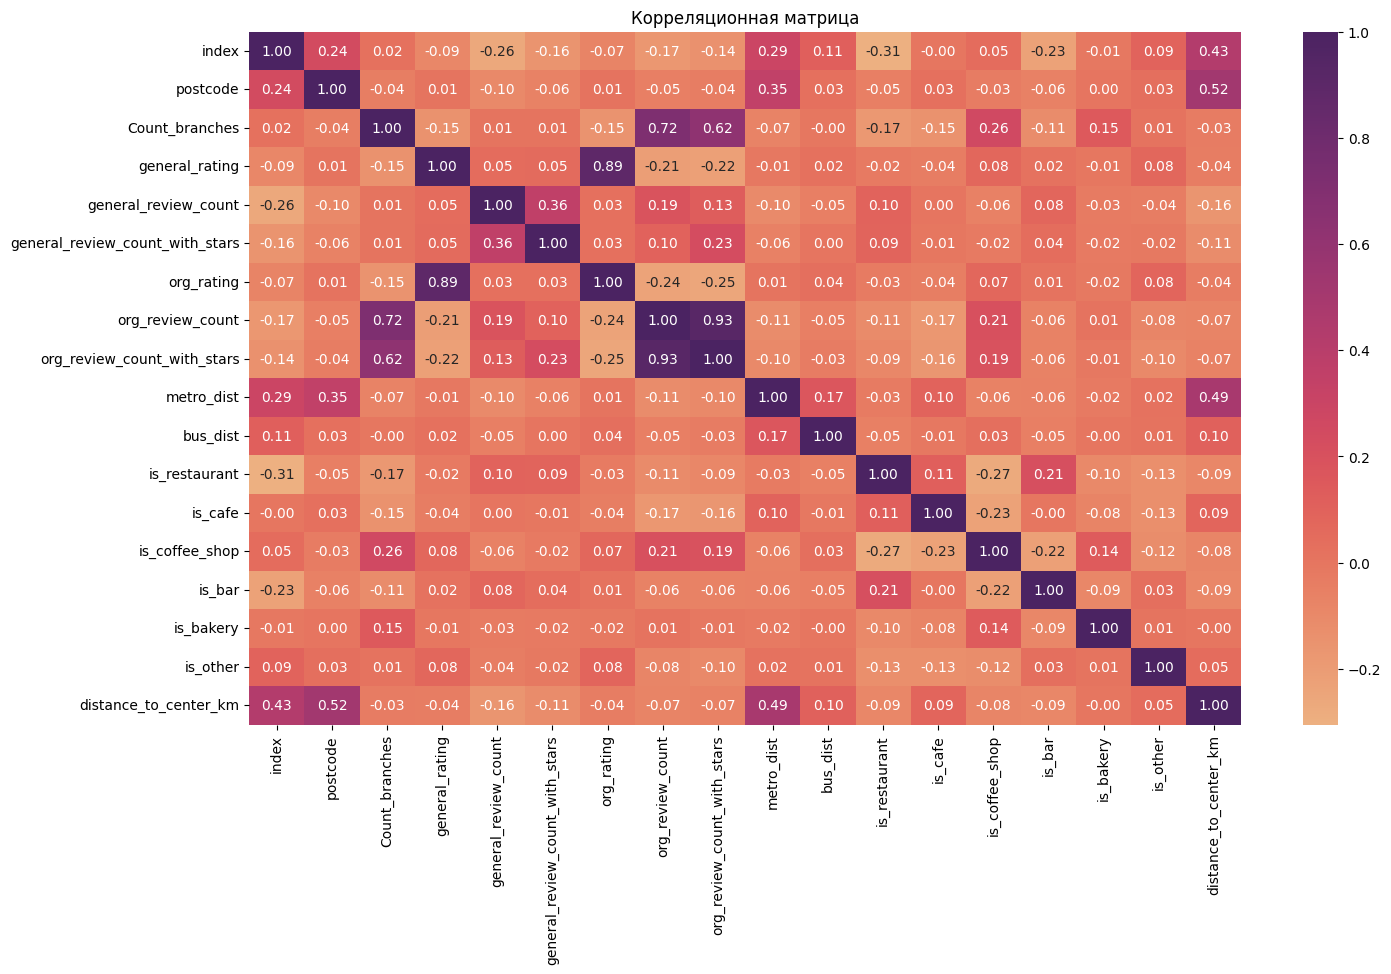

In [ ]:
import seaborn as sns

num_cols = data_filtered.select_dtypes(include=np.number).columns.tolist()

corr_matrix = data_filtered[num_cols].corr()
plt.figure(figsize=(16, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="flare")
plt.title("Корреляционная матрица")
plt.show()

Теперь посмотрим на уровень влияния по убыванию в модуле

In [ ]:
target_corr = corr_matrix["general_rating"].abs().sort_values(ascending=False)
corr_matrix["general_rating"].loc[target_corr.index]

,general_rating
general_rating,1.000000
org_rating,0.891137
org_review_count_with_stars,-0.221967
org_review_count,-0.210057
Count_branches,-0.145469
index,-0.089319
is_other,0.077182
is_coffee_shop,0.075032
general_review_count_with_stars,0.052927
general_review_count,0.050224


Как мы видим, рейтинг организации сильно коррелирует с общим рейтингом, поэтому его можно исключить из анализа.

Также есть небольшая отрицательная связь рейтинга у ресторанов с несколькими филиалами/франшиз.

В целом же большинство переменных практически не влияют на таргет (general_rating), так что нельзя сделать существенные выводы